# Линейная регрессия

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
X = ds[['weight']]
y = ds['height']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучаем модель линейной регрессии на данных, используя в качестве целевой переменной рост (height), а в качестве признака вес (weight).

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

     Actual   Predicted
19      197  175.957807
171     169  175.957807
108     167  166.696348
99      159  164.259122
178     170  171.083355
Mean Absolute Error: 4.482072655809522
Mean Squared Error: 37.97441412254257
Root Mean Squared Error: 6.1623383648208225


Построим прямую регрессии и точки обучающей выборки

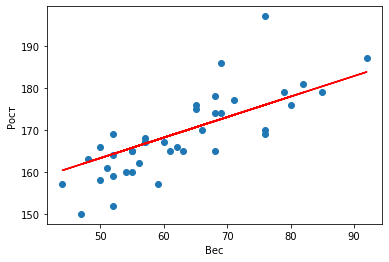

In [8]:
import matplotlib.pyplot as plt

plt.xlabel('Вес')
plt.ylabel('Рост')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')

Расширим пространство признаков, добавив туда пол и repwt.

In [9]:
X = ds[['weight', 'sex', 'repwt']]
y = ds['height']

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X.dropna()
ohe.fit(X)
X_enc = ohe.transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=0)

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

     Actual   Predicted
19      197  179.945400
171     169  179.945400
108     167  164.192990
99      159  163.552430
178     170  179.897286
Mean Absolute Error: 5.513558309884626
Mean Squared Error: 46.631158824598096
Root Mean Squared Error: 6.828701108160914


Видим, что при добавлении новых признаков модель слегка переобучилась и стала выдавать худший результат. Рациональней использовать только признак пола и repht.

# Деревья принятия решений

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [40]:
ds = pd.read_csv('https://raw.githubusercontent.com/sdukshis/ml-intro/master/datasets/Davis.csv', index_col=0)

Рассчитаем, какой процент NaN значений присутствует в столбцах repht и repwt датасета

In [41]:
p1 = ds['repht'].isna().sum() / ds['repht'].shape[0] * 100
p2 = ds['repwt'].isna().sum() / ds['repwt'].shape[0] * 100
print("Процент NaN значений в столбце repht:", p1)
print("Процент NaN значений в столбце repwt:", p2)

Процент NaN значений в столбце repht: 8.5
Процент NaN значений в столбце repwt: 8.5


Т.к процент оказался небольшим, удаляем строки, содержащие NaN значения

In [42]:
ds = ds.dropna()

Рассчитаем коэффициент корреляции для каждого предполагаемого параметра

In [43]:
import scipy 
y = ds['height']
r, p = scipy.stats.pearsonr(ds['weight'], y)
print("Коэффициент корреляции роста с весом: ", r)
r, p = scipy.stats.pearsonr(ds['repwt'], y)
print("Коэффициент корреляции роста с repwt: ", r)
r, p = scipy.stats.pearsonr(ds['repht'], y)
print("Коэффициент корреляции роста с repht: ", r)

Коэффициент корреляции роста с весом:  0.7684924344931975
Коэффициент корреляции роста с repwt:  0.7827869550254
Коэффициент корреляции роста с repht:  0.9755870083092837


Наибольший процент корреляции роста оказался с параметром repht и, очевидно, с полом, так что построим модель на основе этих 2-ух признаков

In [44]:
X = ds[['sex', 'repht']] #выбираем 2 самых значимых параметра для предсказания роста
y = ds['height']

Закодируем категориальные данные (М, Ж) с помощью OneHotEncoder

In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X)
X = ohe.transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
DTR = DecisionTreeRegressor() 
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

     Actual   Predicted
89      163  163.400000
8       186  182.285714
66      162  163.400000
195     164  163.500000
148     157  160.000000
Mean Absolute Error: 2.6812805376441755
Mean Squared Error: 21.269757577491486
Root Mean Squared Error: 4.61191474091743


In [54]:
RFR = RandomForestRegressor() 
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

     Actual   Predicted
89      163  163.448035
8       186  182.316672
66      162  163.448035
195     164  164.451806
148     157  160.140970
Mean Absolute Error: 2.5520903160135324
Mean Squared Error: 19.178504021843263
Root Mean Squared Error: 4.379326891411883


# Классификация

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

In [55]:
X, y = make_classification(
    n_samples = 1000,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_repeated = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    weights = (0.15, 0.85),
    class_sep = 6.0,
    hypercube = False,
    random_state = 2,
)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Отражаем с помощью круговой диаграммы распределение выборки по классам

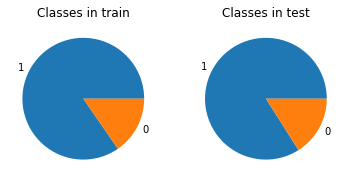

In [76]:
fig, axs = plt.subplots(1, 2)
axs[0].pie([list(y_train).count(1), list(y_train).count(0)], labels=['1', '0'])
axs[0].set_title('Classes in train')
axs[1].pie([list(y_test).count(1), list(y_test).count(0)], labels=['1', '0'])
axs[1].set_title('Classes in test')
plt.show()

# Логистическая регрессия

In [114]:
LR= LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
print('Доля верных ответов для лог. регрессии:', 1 - mean_absolute_error(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.93      0.97      0.95       168

    accuracy                           0.92       200
   macro avg       0.87      0.80      0.83       200
weighted avg       0.91      0.92      0.91       200

Доля верных ответов для лог. регрессии: 0.915


In [115]:
print('Матрица ошибок для лог.регрессии:')
print(confusion_matrix(y_test, y_pred))

Матрица ошибок для лог.регрессии:
[[ 20  12]
 [  5 163]]


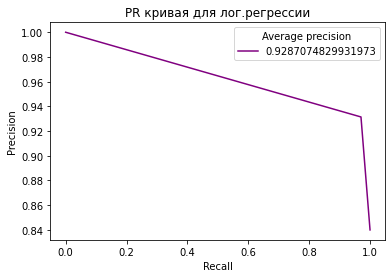

In [116]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('PR кривая для лог.регрессии')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend({average_precision_score(y_test, y_pred) : 'Average precision'}, title = 'Average precision')
plt.show() 

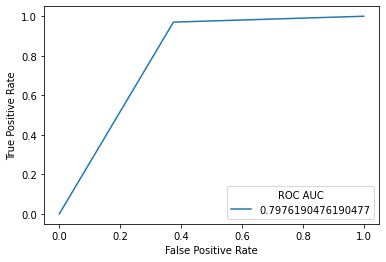

In [119]:
fpr, tpr, _ = roc_curve (y_test, y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend({roc_auc_score(y_test, y_pred) : 'ROC AUC'}, title = 'ROC AUC')
plt.show() 

# Метод K-ближайших соседей

In [120]:
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
y_pred = KNC.predict(X_test)
print(classification_report(y_test, y_pred))
print('Доля верных ответов для KNN:', 1 - mean_absolute_error(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        32
           1       0.92      0.96      0.94       168

    accuracy                           0.90       200
   macro avg       0.84      0.76      0.79       200
weighted avg       0.89      0.90      0.89       200

Доля верных ответов для KNN: 0.9


In [121]:
print('Матрица ошибок для KNN:')
print(confusion_matrix(y_test, y_pred))

Матрица ошибок для KNN:
[[ 18  14]
 [  6 162]]


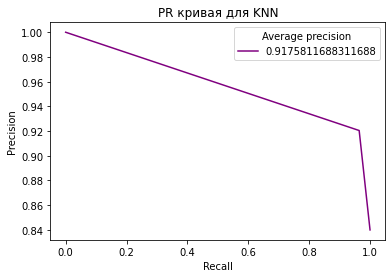

In [122]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('PR кривая для KNN')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend({average_precision_score(y_test, y_pred) : 'Average precision'}, title = 'Average precision')

plt.show() 

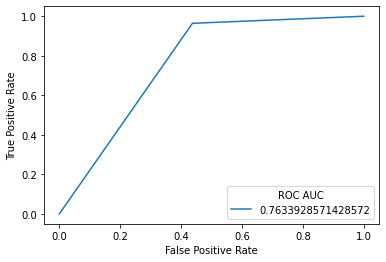

In [123]:
fpr, tpr, _ = roc_curve (y_test, y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend({roc_auc_score(y_test, y_pred) : 'ROC AUC'}, title = 'ROC AUC')
plt.show() 